In [1]:
import numpy as np
import math
import soundfile as sf
import matplotlib.pyplot as plt
import warnings
from scipy.spatial.distance import pdist, cdist, squareform
warnings.filterwarnings('ignore')

In [2]:
def py_awgn(input_signal, snr_dB, rate=1.0):
    avg_energy = np.sum(np.dot(input_signal.T, input_signal)) / input_signal.shape[0]
    snr_linear = 10 ** (snr_dB / 10.0)
    noise_variance = avg_energy / (2 * rate * snr_linear)
    noise = np.array([np.sqrt(2 * noise_variance) * np.random.randn(input_signal.shape[0])], ndmin=2)
    output_signal = input_signal + noise.T
    return output_signal

def Kernel_Ridge(Xtrain, Ytrain, Xtest, sigma, lamda):
    ' use of a kernel based solution to calculate the output Y_out'

    # Design matrix K
    pairwise_sq_dists = squareform(pdist(Xtrain, 'sqeuclidean'))
    K  = np.exp(-pairwise_sq_dists / sigma**2)     
    kx = np.exp(-cdist(Xtrain, Xtest,'sqeuclidean')/sigma**2)
    A  = np.linalg.inv(K + lamda * np.identity(len(K)))
    B  = np.matmul(kx.T,A)
    Y_out = np.matmul(B,Ytrain)
    
    return Y_out

In [3]:
np.random.seed(0)
N = 2000
samples = 10000
indices = range(0, samples,int(samples/N))
start = 150000
[data, fs] = sf.read('BladeRunner.wav')
sound = np.array(data[start:(start+samples+1), :], dtype=np.float32)
y = np.reshape(sound[indices, 0], newshape=(len(indices), 1))
Ts = 1/fs
x = np.array(range(0, samples)).transpose()*Ts
x = x[indices]
x = np.reshape(x, newshape=(x.shape[0], 1))

In [4]:
# Add white Gaussian noise
snr = 10  # dB
y = py_awgn(y, snr)

# add outliers
O = 0.9*np.max(np.abs(y))
percent = 0.05
M = int(math.floor(percent*N))
out_ind = np.random.choice(N, M, replace=False)
outs = np.sign(np.random.randn(M, 1))*O
y[out_ind] = y[out_ind] + outs

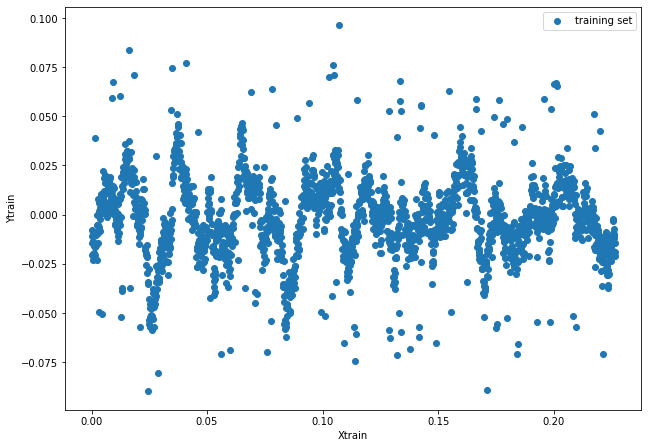

In [9]:
Xtrain = x
Y_train = y

fig = plt.figure(figsize = (10, 7))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.scatter(Xtrain, Y_train, label = "training set")
plt.xlabel('Xtrain')
plt.ylabel('Ytrain')
plt.legend()
plt.show()

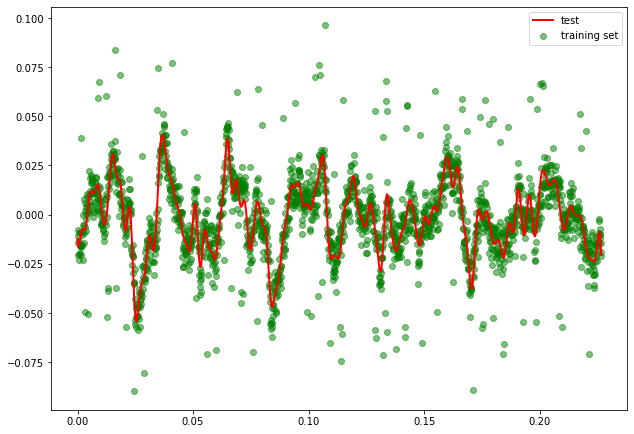

In [6]:
# ridge regression
Xtest = x
Y_test = Kernel_Ridge(Xtrain = Xtrain, Ytrain = Y_train, Xtest = Xtest, sigma= 0.004, lamda = 0.0001)

fig = plt.figure(figsize = (10, 7))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.scatter(Xtrain, Y_train, color ='green'  , alpha = 0.5, label = "training set")
axes.plot(Xtest, Y_test, "r-", linewidth = 2, label = 'test')
plt.legend()
plt.show()

# Part ii

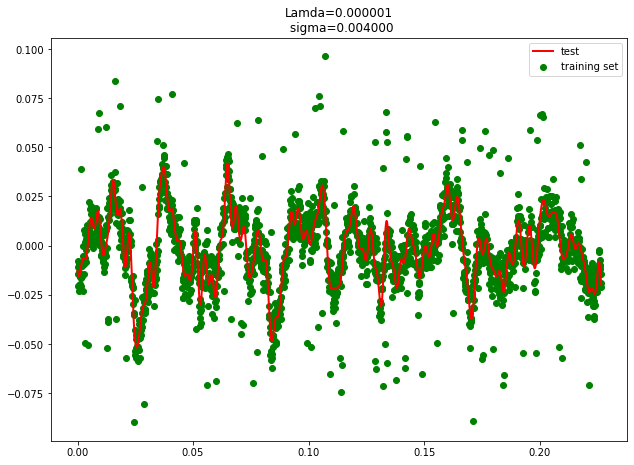

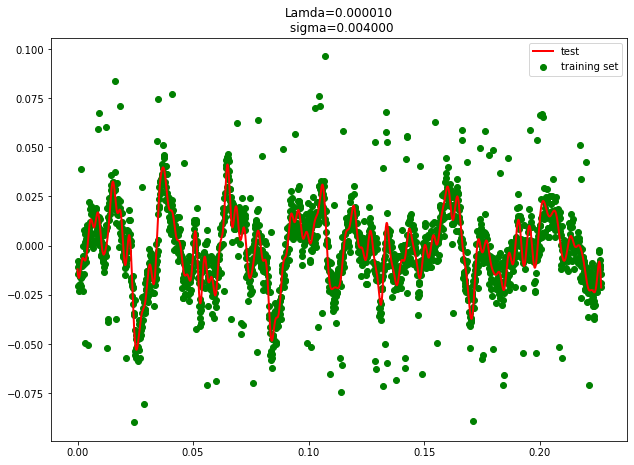

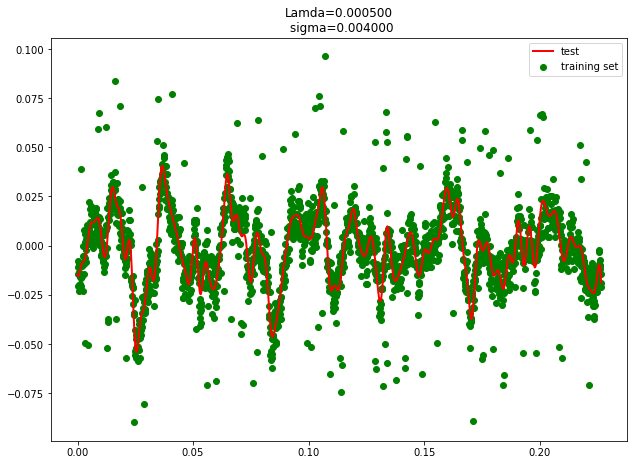

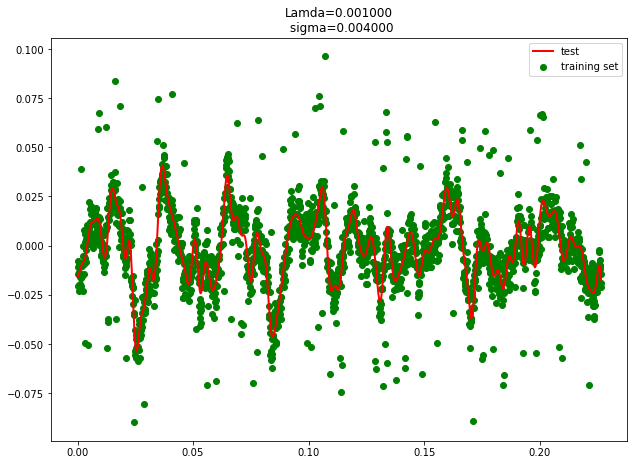

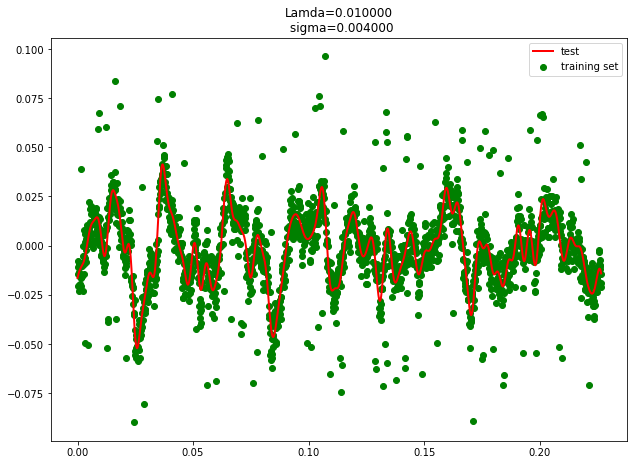

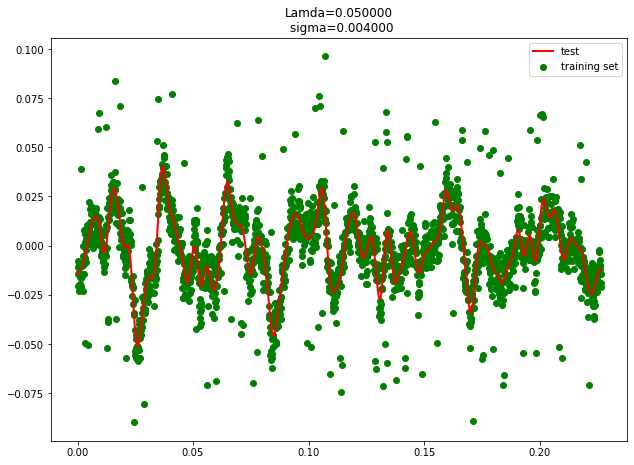

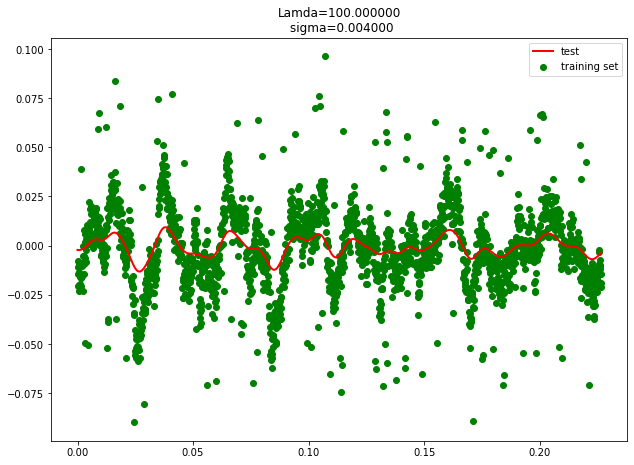

In [15]:
Xtest = x
lamda = np.array([0.000001,0.00001,0.0005,0.001,0.01,0.05,100])
for It in range(len(lamda)):
    Y_test = Kernel_Ridge(Xtrain = Xtrain, Ytrain = Y_train, Xtest = Xtest, sigma=0.004, lamda = lamda[It])

    fig = plt.figure(figsize = (10, 7))
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    axes.scatter(Xtrain, Y_train, color ='green'  , alpha = 1, label = "training set")
    axes.plot(Xtest, Y_test, "r-", linewidth = 2, label = 'test')
    plt.title("Lamda=%f" %lamda[It] + "\n sigma=%f" %0.004)
    plt.legend()
    plt.show()

# Part iii and iv

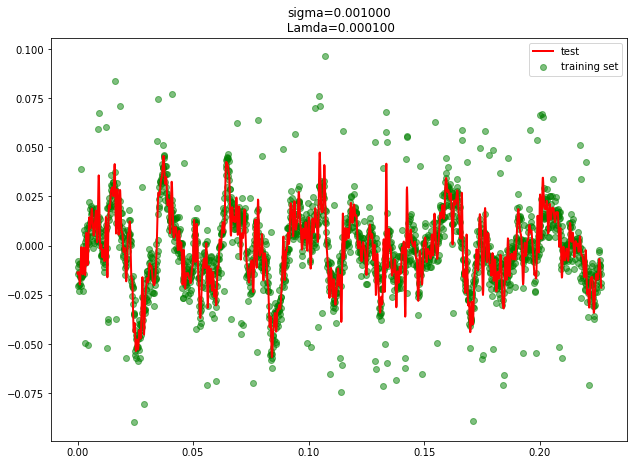

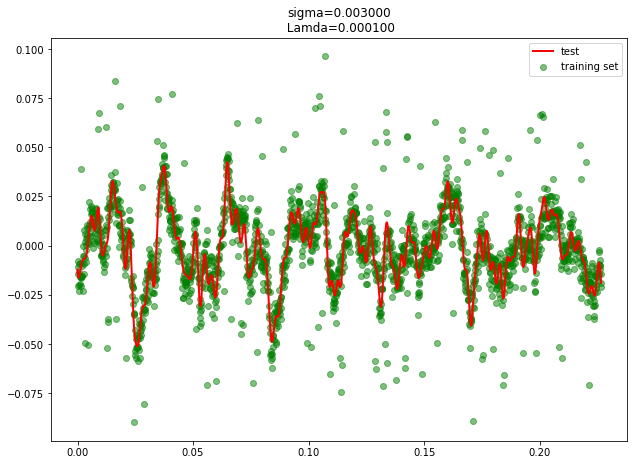

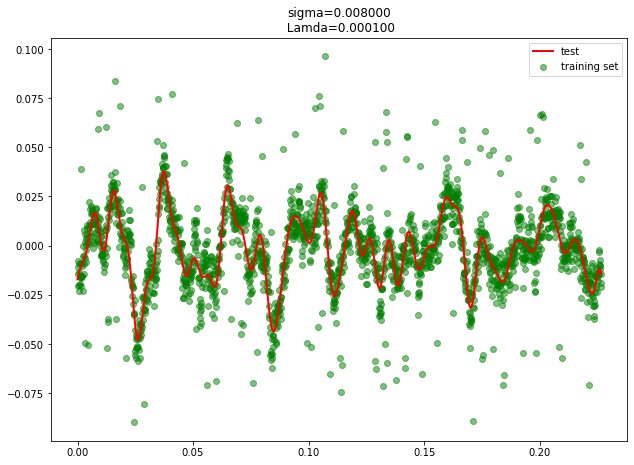

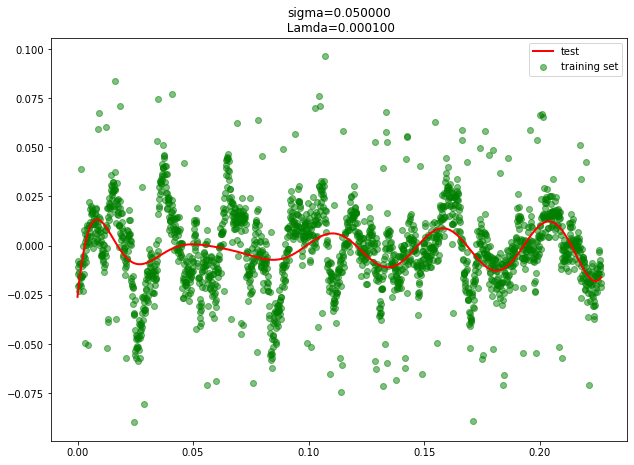

In [8]:
Xtest = x
sigma = np.array([0.001,0.003,0.008,0.05])
for It in range(len(sigma)):
    Y_test = Kernel_Ridge(Xtrain = Xtrain, Ytrain = Y_train, Xtest = Xtest, sigma= sigma[It], lamda = 0.0001)

    fig = plt.figure(figsize = (10, 7))
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

    axes.scatter(Xtrain, Y_train, color ='green'  , alpha = 0.5, label = "training set")
    axes.plot(Xtest, Y_test, "r-", linewidth = 2, label = 'test')
    plt.title("sigma=%f" %sigma[It]  +  "\n Lamda=%f" %0.0001)
    plt.legend()
    plt.show()

# Comment:

***1. Smaller variance value means sharper guassian fitting which results in overfitting but larger the variance, smoother the curve fitting is.*** 

***2. lambda value also has a similar result but it has lesser effect thats why lambda value has to be very high to make the effect visible.***